# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhamad Hafidz Sohibul Fazri
- **Email:** mh1900756@gmail.com
- **ID Dicoding:** muhamadhafidz

## Menentukan Pertanyaan Bisnis

- What is the average number of bicycles rented each season?
- Between casual and registered rent bicycle customer, which one is the most popular in each season?
- At what time do casual customer rent bicycles more often than registered customer?

## Import Semua Packages/Library yang Digunakan

In [501]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Data Wrangling

### Gathering Data

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is 
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then 
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com. 

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

- **Load day Data**

in this process, I will load the datasets then display the top 5 and bottom 5 data

In [502]:
day_df = pd.read_csv('dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [503]:
day_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


- **Load hour Data**

in this process, I will load the datasets then display the top 5 and bottom 5 data

In [504]:
hour_df = pd.read_csv('dataset/hour.csv')

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [505]:
hour_df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


**Insight:**
- hour.csv : bike sharing counts aggregated on hourly basis.
- day.csv - bike sharing counts aggregated on daily basis.
- Weekday is represented using a number, where 0 = sunday, 1 = monday, 2 = tuesday, 3 = wednesday, 4 = thursday, 5 = friday, and 6 = saturday
- The `yr` and `mnth` columns are representations of year and month
- Season is represented using a number, where 1 = spring, 2 = summer, 3 = fall, and 4 = winter
- because the hour_df dataset is more detailed, I will use the hour_df dataset to carry out the analysis

### Assessing Data

- **View info for each column in both dataset**

in this process, I want to see there is missing value or not and the data type in each column

In [506]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- **Check the duplicated data**

In this process, i want to see there is duplicate data or not

In [507]:
print('Amount of duplicated data: ', hour_df.duplicated().sum())

Amount of duplicated data:  0


- **Check descriptive statistic hour_df**

In this process, i want to see how descriptive statistics from hour_df

In [508]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- There were no missing values ​​in both datasets
- There have wrong data type on `dteday` column in both dataset
- There were no have duplicate data in both datasets
- there is no noise or outliers in the both datasets

### Cleaning Data

- **Change the data type of `dteday` column**

In [509]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

- **Change the data in the weekday column**

In this process, I will change the data in the weekday column to make it easier to read

- hour_df

In [510]:
hour_df['weekday'] = hour_df['weekday'].replace(
    {
        0: 'Sunday',
        1: 'Monday',
        2: 'Tuesday',
        3: 'Wednesday',
        4: 'Thursday',
        5: 'Friday',
        6: 'Saturday'
    }
)

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [511]:
hour_df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,Monday,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,Monday,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,Monday,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,Monday,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,Monday,1,1,0.26,0.2727,0.65,0.1343,12,37,49


- **Change the data in the season column**

In this process, I will change the data in the season column to make it easier to read

- hour_df

In [512]:
hour_df['season'] = hour_df['season'].replace(
    {
        1: 'Spring',
        2: 'Summer',
        3: 'Fall',
        4: 'Winter'
    }
)

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [513]:
hour_df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,Spring,1,12,19,0,Monday,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,Spring,1,12,20,0,Monday,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,Spring,1,12,21,0,Monday,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,Spring,1,12,22,0,Monday,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,Spring,1,12,23,0,Monday,1,1,0.26,0.2727,0.65,0.1343,12,37,49


**Insight:**
- Changing the data type of `dteday` column into datetime
- Changing the data in the weekday column to make it easier to read
- Changing the data in the season column to make it easier to read

## Exploratory Data Analysis (EDA)

### Explore day_df and hour_df

- What is the average number of bicycles rented each season?

in this process, I want to see how many bicycles are rented on average in each season

In [514]:
hour_df.groupby(by='season')['cnt'].mean()

season
Fall      236.016237
Spring    111.114569
Summer    208.344069
Winter    198.868856
Name: cnt, dtype: float64

- Between casual and registered bike retailers, which one is the most popular in each season?

In this process, I want to see most popular bicycle rental in each season between casual and registered

In [515]:
hour_df.groupby(by='season')[['casual', 'registered']].nunique().reset_index()

,season,casual,registered
0,Fall,256,648
1,Spring,156,442
2,Summer,288,618
3,Winter,240,610


In [516]:
hour_df.groupby(by='hr')[['casual', 'registered']].nunique().reset_index()

,hr,casual,registered
0,0,52,135
1,1,40,107
2,2,32,86
3,3,26,44
4,4,13,19
5,5,12,54
6,6,20,178
7,7,37,349
8,8,61,445
9,9,104,302


**Insight:**
- Fall is the most popular season for bike rentals and spring is the season that has the lowest average bicycle rental
- Registered customers always dominate bicycle rentals throughout the season
- Registered customers always dominate bicycle rentals throughout the day

## Visualization & Explanatory Analysis

### Pertanyaan 1: What is the average number of bicycles rented each season?

In [517]:
mean_season_hour_df = hour_df.groupby(by='season')['cnt'].mean().sort_values().reset_index()

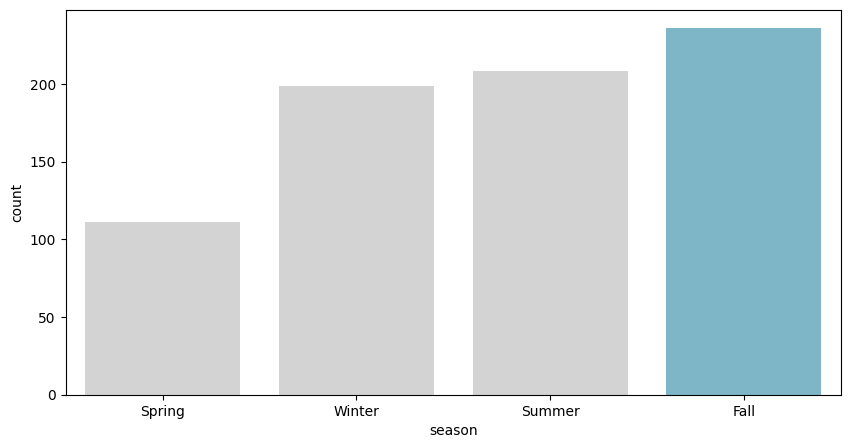

In [518]:
colors = ["#D3D3D3","#D3D3D3", "#D3D3D3", "#72BCD4"]

plt.figure(figsize=(10, 5))

sns.barplot(
    x='season',
    y='cnt',
    data=mean_season_hour_df,
    palette=colors,
    hue='season',
    legend=False
)

plt.xlabel('season')
plt.ylabel('count')
plt.show()

### Pertanyaan 2: Between casual and registered bike retailers, which one is the most popular in each season?

In [519]:
casual_registered_df = hour_df.groupby(by='season')[['casual', 'registered']].nunique().reset_index()
casual_registered_df = pd.melt(casual_registered_df, id_vars=['season'], value_vars=['casual', 'registered'], var_name='cust_type', value_name='count')

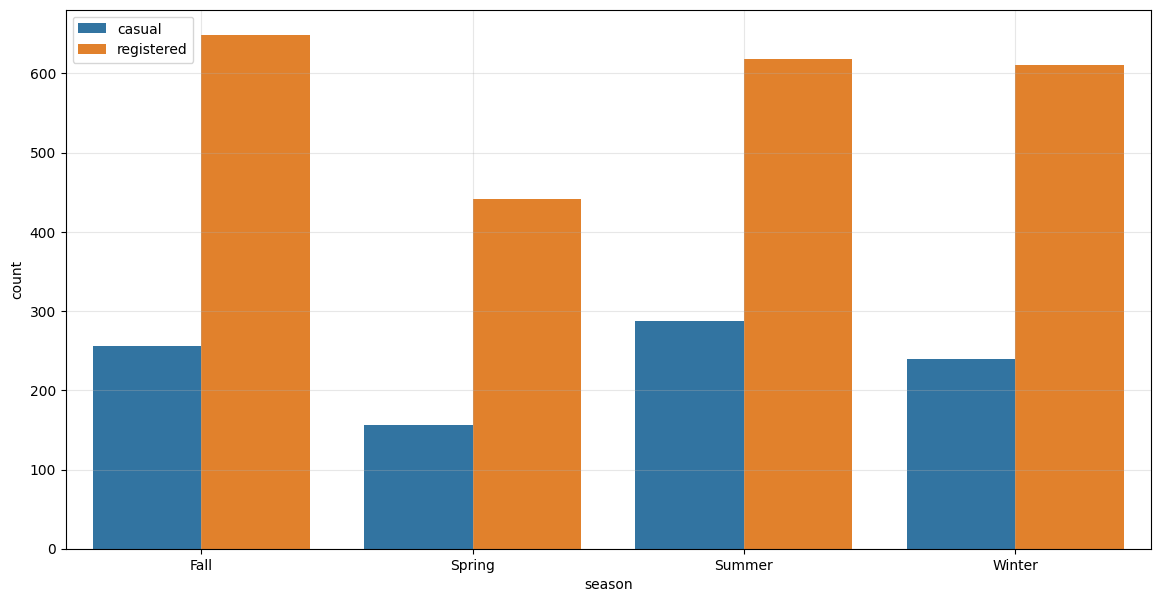

In [520]:
plt.figure(figsize=(14, 7))

sns.barplot(
    x='season',
    y='count',
    data=casual_registered_df,
    hue='cust_type'
)

plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

### Pertanyaan 3: At what time do casual customer rent bicycles more often than registered customer?

In [521]:
_hour_df = hour_df.groupby('hr')[['casual', 'registered']].nunique().reset_index()
_hour_df = pd.melt(
    _hour_df,
    id_vars=['hr'],
    value_vars=['casual', 'registered'],
    var_name='cust_type',
    value_name='count'
)

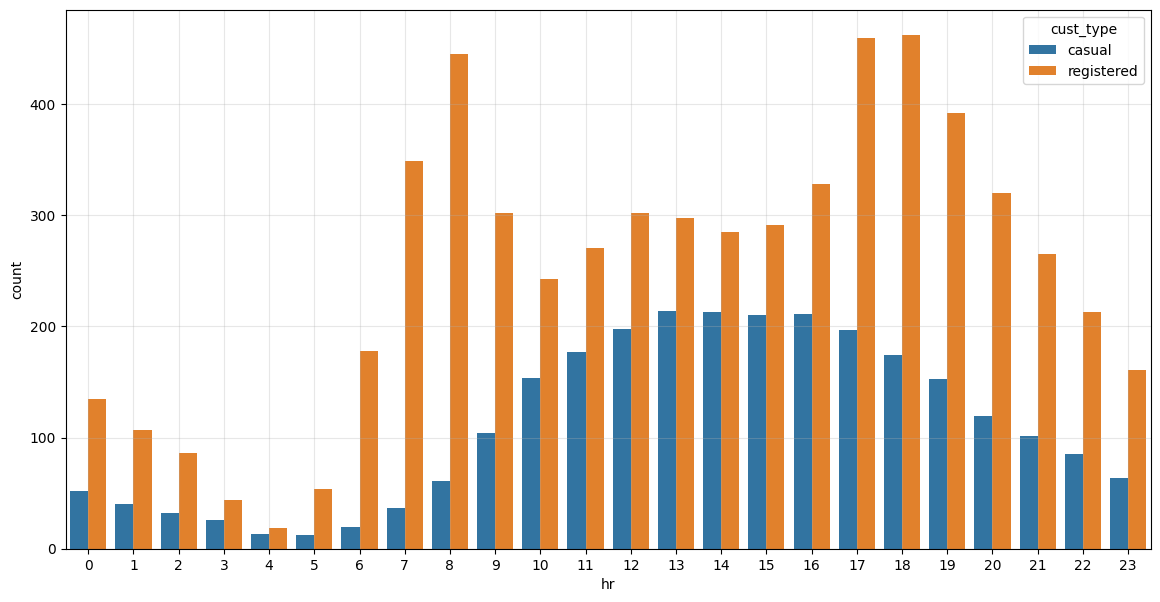

In [522]:
plt.figure(figsize=(14, 7))

sns.barplot(
    x='hr',
    y='count',
    data=_hour_df,
    hue='cust_type'
)

plt.grid(True, alpha=0.3)
plt.show()

In [523]:
am_hour_df = _hour_df[_hour_df['hr'] < 12].reset_index()

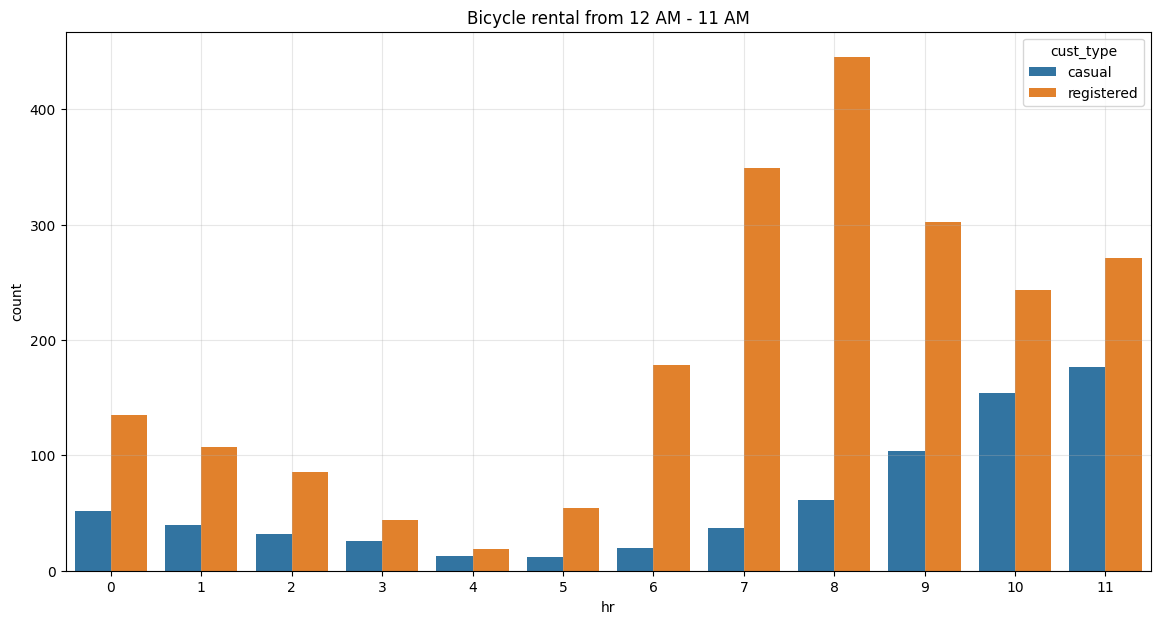

In [524]:
plt.figure(figsize=(14, 7))

sns.barplot(
    x='hr',
    y='count',
    data=am_hour_df,
    hue='cust_type'
)

plt.title('Bicycle rental from 12 AM - 11 AM')
plt.grid(True, alpha=0.3)
plt.show()

In [525]:
pm_hour_df = _hour_df[_hour_df['hr'] > 11]

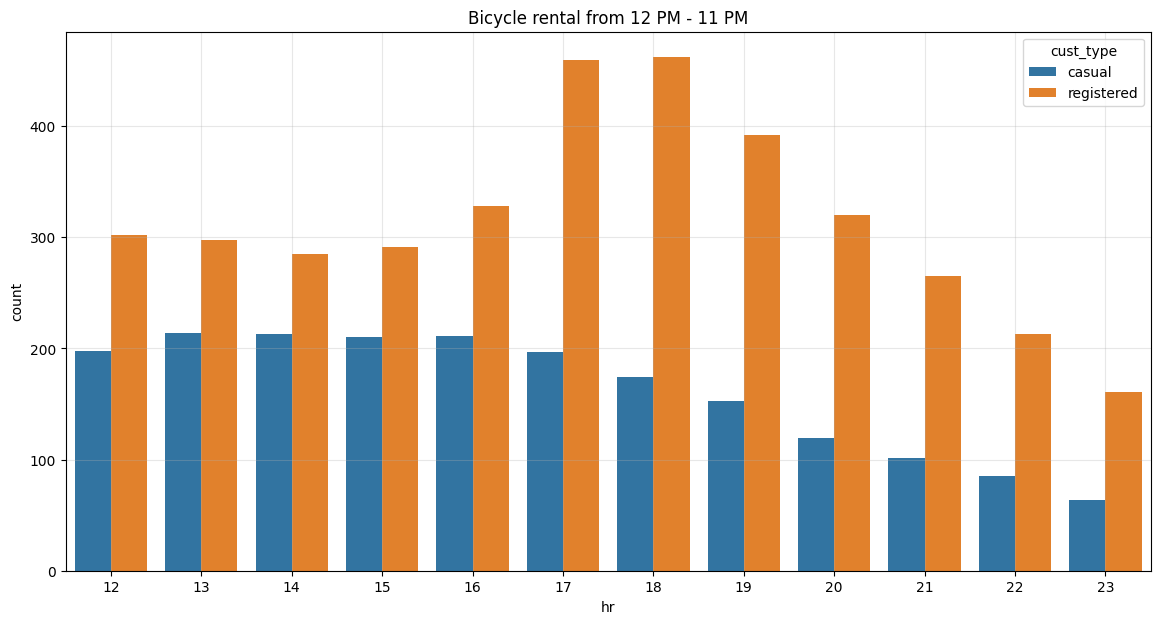

In [526]:
plt.figure(figsize=(14, 7))

sns.barplot(
    x='hr',
    y='count',
    data=pm_hour_df,
    hue='cust_type'
)

plt.title('Bicycle rental from 12 PM - 11 PM')
plt.grid(True, alpha=0.3)
plt.show()

**Insight:**
- Fall is the most popular season for bike rentals and spring is the season that has the lowest average bicycle rental
- Registered customers always dominate bicycle rentals throughout the season
- Registered customers always dominate bicycle rentals throughout the day

## Analisis Lanjutan (Opsional)

## Conclusion

- Fall as the Peak Season for Bike Rentals: Fall is the most popular season for bike rentals, with the highest average rentals compared to other seasons. This could be due to ideal weather conditions or other factors that encourage more bike usage during this season. In contrast, Spring has the lowest average rentals, possibly indicating less favorable weather or lower outdoor activity during this time.

- Dominance of Registered Users: Throughout all seasons, registered users consistently dominate bike rentals compared to casual users. This suggests that loyal customers, or those subscribed to the service, tend to rent bikes more frequently than occasional users.

- Registered Users' Dominance Throughout the Day: Registered users also dominate bike rentals across all hours of the day. This indicates that registered users likely incorporate bike rentals into their daily routines, such as commuting or other regular activities, whereas casual users rent bikes less frequently throughout the day.

In [527]:
mean_season_hour_df.to_csv('mean_season_hour.csv', index=False)
casual_registered_df.to_csv('casual_registered.csv', index=False)
pm_hour_df.to_csv('pm_hour.csv', index=False)
am_hour_df.to_csv('am_hour.csv', index=False)